In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

# for converting currency to int
from decimal import Decimal
from re import sub

In [87]:
#input_file = "data.csv"
input_file= os.path.join('data.csv')
data_df = pd.read_csv(input_file)

In [88]:
new_df=data_df.drop([ 'Release Clause','Loaned From', 'Joined'], axis='columns')
new_df.drop(new_df.columns[26:52], axis=1, inplace=True)
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [89]:
#new_df.dropna(axis = 0, how ='any', inplace = True)
new_df=new_df.dropna()
new_df.isnull().sum()
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [90]:
# changing Wage to int
wage_value=[]

for wage in new_df['Wage']:
    string_val = sub(r'[^\d.]', '000', wage)
    wage_value.append(string_val)

new_df['Wage'] = wage_value
new_df['Wage'] = new_df['Wage'].astype(int)


In [91]:
# 1. Create bins for player age groups and correlate with salary/wages
age_bins = [15, 20, 25, 30, 35,40,50]
age_groups = ["<20", "21-25","26-30","31-35","36-40",">40"]

# purchase_data["Age Range"] = pd.cut(purchase_data["Age"],age_bins,labels = group_names)
# purchase_data.head()

In [92]:
leftright_pd = data_df[["Preferred Foot","Dribbling", "BallControl"]]
left_pd = leftright_pd.loc[leftright_pd["Preferred Foot"]== "Left", :]
right_pd = leftright_pd.loc[leftright_pd["Preferred Foot"]=="Right", :]

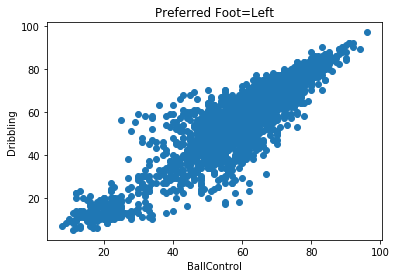

<Figure size 432x288 with 0 Axes>

In [93]:
plt.scatter(left_pd["BallControl"], left_pd["Dribbling"], marker="o" )
plt.title("Preferred Foot=Left")
plt.xlabel("BallControl")
plt.ylabel("Dribbling")
# Prints the scatter plot to the screen
plt.show()
plt.savefig("Left_foot.png")

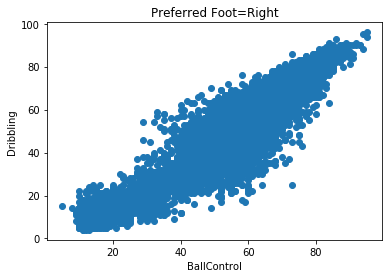

<Figure size 432x288 with 0 Axes>

In [94]:
plt.scatter(right_pd["BallControl"], right_pd["Dribbling"], marker="o")
plt.title("Preferred Foot=Right")
plt.xlabel("BallControl")
plt.ylabel("Dribbling")
# Prints the scatter plot to the screen
plt.show()
plt.savefig("Right_foot.png")

In [95]:
age_range_df = pd.DataFrame(new_df)
age_range_df['Age Range'] = pd.cut(age_range_df["Age"],age_bins,labels = age_groups)
age_range_df = age_range_df[['ID','Name','Age','Age Range','Wage','Value']]

age_range_df.head()

,ID,Name,Age,Age Range,Wage,Value
0,158023,L. Messi,31,31-35,565000,€110.5M
1,20801,Cristiano Ronaldo,33,31-35,405000,€77M
2,190871,Neymar Jr,26,26-30,290000,€118.5M
3,193080,De Gea,27,26-30,260000,€72M
4,192985,K. De Bruyne,27,26-30,355000,€102M


In [96]:
age_analysis_df = pd.DataFrame(age_range_df.groupby(['Age Range']).count())
age_analysis_df["Percent Age"] =(round(100*age_analysis_df["ID"]/sum(age_analysis_df["ID"]), 2)).astype(str) + "%"
age_analysis_df['Total Wage'] = age_range_df.groupby(['Age Range'])[['Wage']].sum()
age_analysis_df = age_analysis_df.rename(columns={"ID":"Count"})
age_analysis_df = age_analysis_df.drop(["Name", "Age", "Wage", "Value"], axis=1)
age_analysis_df["Average Wage"] = age_analysis_df["Total Wage"]/age_analysis_df["Count"]

In [97]:
age_analysis_df

,Count,Percent Age,Total Wage,Average Wage
Age Range,,,,
<20,3304,18.44%,11006000,3331.113801
21-25,6666,37.2%,59129000,8870.237024
26-30,5412,30.2%,74777000,13816.888396
31-35,2247,12.54%,30427000,13541.165999
36-40,281,1.57%,1737000,6181.494662
>40,8,0.04%,21000,2625.000000


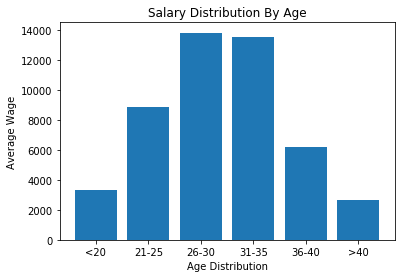

In [98]:
plt.bar(age_analysis_df.index, age_analysis_df["Average Wage"])
plt.xlabel("Age Distribution")
plt.ylabel("Average Wage")
plt.title("Salary Distribution By Age")
plt.savefig("Salary Distribution By Age.png")

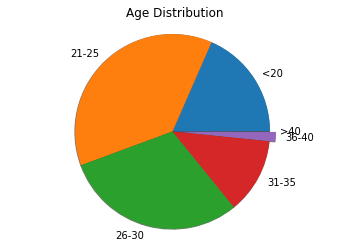

In [99]:
plt.pie(age_analysis_df["Count"], labels=age_groups,explode=[0, 0, 0, 0, .3, 0], shadow=True, radius=5)
plt.title("Age Distribution")
plt.axis("equal")
plt.savefig("Age Distribution.png")